## SABR Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [17]:
strike = np.linspace(70,130,num=51)
#strike = 1
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [18]:
sabr1 = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr1.__dict__

{'alpha': 0.3,
 'beta': 1,
 'bsm_model': <option_models.bsm.Model at 0x1ab06727278>,
 'divr': 0,
 'intr': 0,
 'rho': 0.25,
 'sigma': 0.2,
 'texp': 1}

In [19]:
sabr1.bsm_vol(strike, forward, texp)
price = sabr1.price(strike, forward)
bsm_vol = sabr1.bsm_vol(strike, forward)

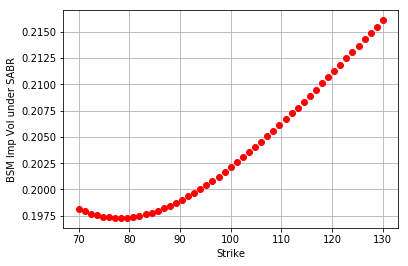

In [20]:
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [21]:
sabr1.impvol(price[11], strike[11], forward)

0.19999999999999862

In [2]:
### only run this when you changed the class definition
import imp
imp.reload(opt)

<module 'option_models' from 'C:\\Users\\jaehyuk\\Documents\\GitHub\\SABRmodel_Base\\option_models\\__init__.py'>

In [3]:
strike = np.linspace(70,130,num=51)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [4]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

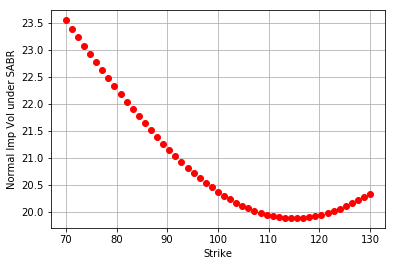

In [5]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [6]:
sabr1 = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr1.__dict__

{'alpha': 0.5,
 'beta': 0.0,
 'divr': 0,
 'intr': 0,
 'normal_model': <option_models.normal.Model at 0x1b20bcae908>,
 'rho': -0.25,
 'sigma': 20,
 'texp': 1}

In [7]:
sabr1.norm_vol(strike, forward, texp)
price = sabr1.price(strike, forward, sigma=None)
price

array([ 31.1331502 ,  30.03041103,  28.9360468 ,  27.85073793,
        26.7752096 ,  25.71023258,  24.65662363,  23.61524533,
        22.58700539,  21.57285512,  20.57378715,  19.59083215,
        18.62505452,  17.67754689,  16.7494235 ,  15.84181212,
        14.95584482,  14.09264731,  13.25332711,  12.43896049,
        11.65057857,  10.88915252,  10.15557852,   9.45066243,
         8.77510503,   8.12948788,   7.51426057,   6.92972972,
         6.37605016,   5.85321881,   5.36107143,   4.89928263,
         4.46736912,   4.06469617,   3.69048723,   3.3438362 ,
         3.02372217,   2.72902591,   2.45854772,   2.21102592,
         1.98515541,   1.77960589,   1.59303899,   1.42412418,
         1.27155295,   1.13405117,   1.01038943,   0.89939139,
         0.79994016,   0.71098283,   0.63153333])

In [9]:
sabr1.impvol(price[11], strike[11], forward)

21.907734140777496


19.99999999999972